#統計推論 Homework3

##應數碩一 M112040034 李祐瑄

###1.自行按公式寫出Bonferroni、Holm's與FDR調整p-value的函式，並應用於w07投影片第41頁的例子。 

匯入p-values 以及指定 α

In [ ]:
import numpy as np
p_values = np.array([0.0001, 0.0058, 0.0132, 0.0289, 0.0498, 0.0911, 0.2012, 0.5718, 0.8912, 0.9011])
n = len(p_values)
alpha = 0.05

--------------------------------------------------------------------------------
※Bonferroni bound

輸出為拒絕哪個假設，以及不拒絕那個假設

最後輸出指拒絕了第一個假設

In [ ]:
#%%Bonferroni bound
print("----------Bonferroni bound----------")
# 計算 Bonferroni 校正後的閾值
bonferroni_threshold = alpha / n
print("threshold = ", bonferroni_threshold)
# 檢查每個 p-value 是否小於 Bonferroni 校正後的閾值
def bonferroni (p_value_arr):
    bonff_rejected_hypo=[]
    bonferroni_threshold = alpha / n
    for i, p in enumerate(p_value_arr):
        if p <= bonferroni_threshold:
            print(f"Reject null hypothesis {i+1} for p-value = {p}")
            bonff_rejected_hypo.append(i+1)
        else:
            print(f"Fail to reject null hypothesis {i+1} for p-value = {p}")
    return bonff_rejected_hypo

print('the rejected null hypothesis by bonferroni bound:', bonferroni(p_values))

----------Bonferroni bound----------
threshold =  0.005
Reject null hypothesis 1 for p-value = 0.0001
Fail to reject null hypothesis 2 for p-value = 0.0058
Fail to reject null hypothesis 3 for p-value = 0.0132
Fail to reject null hypothesis 4 for p-value = 0.0289
Fail to reject null hypothesis 5 for p-value = 0.0498
Fail to reject null hypothesis 6 for p-value = 0.0911
Fail to reject null hypothesis 7 for p-value = 0.2012
Fail to reject null hypothesis 8 for p-value = 0.5718
Fail to reject null hypothesis 9 for p-value = 0.8912
Fail to reject null hypothesis 10 for p-value = 0.9011
the rejected null hypothesis by bonferroni bound: [1]


--------------------------------------------------------------------------------
※Holm's procedure

輸出為拒絕哪個假設，以及不拒絕那個假設

最後輸出指拒絕了第一個假設，以此例而言，Bonferroni 與 Holm's的作法，都只拒絕了第一個p-value

In [ ]:
#%%Holm's procedure
print("----------Holm's procedure----------")
# Step 1: 排序p-value
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]
print("sorted p-value:", sorted_p_values)
print("original index of sorted p-values", sorted_indices+1)
# Step 2: 計算調整過後的alpha for each hypothesis
thresholds = np.round(alpha / (n - np.arange(n)), 5)

def holm (sorted_array):
    # Step 3: apply Holm's procedure
    rejected = np.zeros_like(sorted_p_values, dtype=bool) # initialize to all false
    for i in range(n):
        if sorted_p_values[i] <= thresholds[i]:
            rejected[i] = True
        else:
            break # 找到第一個不拒絕的就停止
    holm_rejected_hypo=[]
    # print the results
    for i in range(n):
        if rejected[i]:
            print(f"Reject null hypothesis {sorted_indices[i]+1} with p-value {p_values[sorted_indices[i]]:} ≦ threshold = {thresholds[i]}")
            holm_rejected_hypo.append(sorted_indices[i]+1)
        else:
            print(f"Fail to reject null hypothesis {sorted_indices[i]+1} with p-value {p_values[sorted_indices[i]]:}.")
    return holm_rejected_hypo

print("the rejected null hypothesis by holm's procedure:", holm(sorted_p_values))

----------Holm's procedure----------
sorted p-value: [1.000e-04 5.800e-03 1.320e-02 2.890e-02 4.980e-02 9.110e-02 2.012e-01
 5.718e-01 8.912e-01 9.011e-01]
original index of sorted p-values [ 1  2  3  4  5  6  7  8  9 10]
Reject null hypothesis 1 with p-value 0.0001 ≦ threshold = 0.005
Fail to reject null hypothesis 2 with p-value 0.0058.
Fail to reject null hypothesis 3 with p-value 0.0132.
Fail to reject null hypothesis 4 with p-value 0.0289.
Fail to reject null hypothesis 5 with p-value 0.0498.
Fail to reject null hypothesis 6 with p-value 0.0911.
Fail to reject null hypothesis 7 with p-value 0.2012.
Fail to reject null hypothesis 8 with p-value 0.5718.
Fail to reject null hypothesis 9 with p-value 0.8912.
Fail to reject null hypothesis 10 with p-value 0.9011.
the rejected null hypothesis by holm's procedure: [1]


--------------------------------------------------------------------------------
※FDR adjust

最後的輸出為經過FDR調整後的p-values，以及調整前後有哪些p-value小於0.05，共幾個


透過FDR調整p-value，可以控制False Positive Rate的比例，避免在多次比較的情況下產生過多的假陽性結果。使用FDR調整後的p-values，可以看到假設在0.05的顯著性水平下，只有3個p-value小於0.05，而原本有5個p-value小於0.05，顯示使用FDR可以減少FPR的比例。

In [ ]:
#%%FDR
print("----------FDR control----------")
def fdr_adjust(p_values):

    m = len(p_values)
    #將p-values的順序倒轉
    flip_p_values = np.flip(p_values)
    adjusted_p_values=np.array([])
    for i in range(m):
        if i == 0 :
            adjusted_p_values = np.append(adjusted_p_values, flip_p_values[i])
        else:
            #與調整後的p值做比較，較小的存入array
            adjusted_p_values = np.append(adjusted_p_values, min(adjusted_p_values[i-1], flip_p_values[i]*m/(10-i)))
    
    adjusted_p_values = np.round(adjusted_p_values, 4)
    #將調整後的p值倒轉回原來的順序以供返回
    result = np.flip(adjusted_p_values)
    
    return result

print("the p-values adjusted by FDR:\n",fdr_adjust(p_values))

below_threshold = p_values[p_values<alpha]
print("the original p-values which are < 0.05:",below_threshold,', total:',len(below_threshold))
below_threshold = fdr_adjust(p_values)[fdr_adjust(p_values)<alpha]
print("the adjusted p_values which are < 0.05:",below_threshold,', total:',len(below_threshold))

----------FDR control----------
the p-values adjusted by FDR:
 [0.001  0.029  0.044  0.0722 0.0996 0.1518 0.2874 0.7148 0.9011 0.9011]
the original p-values which are < 0.05: [0.0001 0.0058 0.0132 0.0289 0.0498] , total: 5
the adjusted p_values which are < 0.05: [0.001 0.029 0.044] , total: 3


###2.根據w10投影片第19頁 a,b,c,d 的設定，在疾病發生率為 20% 與 0.01% 兩種情形下，計算Sensitivity、Specificity、PPV、NPV、PLR與NLR 

Assume N = 100000, b = FP = 10000, c = FN = 2

在這個假設下PLR皆約為8，表示"Moderate evidence to rule in disease"

In [ ]:
#a = TP, b = FP, c = FN, d = TN
#儲存題目給的兩個疾病發生率
import math
incident_rate = [0.2, 0.0001] #(a+c)/(a+b+d+c) = (TP+FN)/N
#Assume N = 10000, b = FP = 500, c = FN = 1
N = 100000
b = 10000
c = 2
for i in range(len(incident_rate)):
  #計算所需參數
  a_plus_c = round(incident_rate[i]*N,4)
  b_plus_d = round(N - a_plus_c,4)
  a = round(a_plus_c - c)
  d = round(b_plus_d - b)
  #計算題目要求
  Sensitivity = round(a/(a_plus_c),4)
  Specificity = round(d/(b_plus_d),4)
  Pos_pred_val = round(a/(a+b),4)
  Neg_pred_val = round(d/(c+d),4)
  Pos_likelihood_ratio = round(Sensitivity/(1-Specificity)*100 ,4)
  Neg_likelihood_ratio = round((1-Sensitivity)/Specificity*100 ,4)
  #輸出a,b,c,d各值
  print("\n當疾病發生率為:", round(a/N,4)*100, "%") 
  print('TP = ', a, 'FP = ', b, '\nFN = ', c, 'TN = ', d)
  print("Sensitivity = ", Sensitivity, ", Specificity = ", Specificity,
    ", PPV = ", Pos_pred_val, ", NPV = ", Neg_pred_val,
    ", PLR = ", Pos_likelihood_ratio,"%", ", NLR = ", Neg_likelihood_ratio,"%")


當疾病發生率為: 20.0 %
TP =  19998 FP =  10000 
FN =  2 TN =  70000
Sensitivity =  0.9999 , Specificity =  0.875 , PPV =  0.6666 , NPV =  1.0 , PLR =  799.92 % , NLR =  0.0114 %

當疾病發生率為: 0.01 %
TP =  8 FP =  10000 
FN =  2 TN =  89990
Sensitivity =  0.8 , Specificity =  0.9 , PPV =  0.0008 , NPV =  1.0 , PLR =  800.0 % , NLR =  22.2222 %


###3.寫出 w11投影片第25頁Partial Correlation樣本版本的兩種公式(第一種是把第一式中的rho換成r，第二種已經給在第二、三個式子)，並找一個資料的例子，說明兩個公式會得到一樣的結果。

data source:https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

使用的column為X = height(cm), Y = weight(kg), Z = age(days)，且皆無NA值

兩種式子計算出的Partial Correlation皆為0.9939

第一個式子中，在分子分母中的減號後面三項，都包含來自最小平方回歸的殘差總和。換句話說，由於這些項都是在計算殘差總和，而且這些殘差總和都是在一個最小平方回歸分析中得出的，因此在計算偏相關係數時沒有貢獻。所以使用第一個式子或第二個式子都可以得到相同的結果。

In [144]:
#載入資料(心血管疾病)
import pandas as pd
data = pd.read_csv('https://bit.ly/3pcHwSo',sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [145]:
#確認沒有NA值
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

先計算X與Y的線性回歸殘差

In [147]:
#計算X和Y分別在Z上的線性回歸殘差
def residual_sum(source1, source2):
  #得到(N,2)的二维数组
  arr_2D = np.vstack([source1, np.ones(len(data))]).T
  #計算斜率
  slope = np.linalg.lstsq(arr_2D, source2, rcond=None)[0]
  #得到y預測值
  y_hat = np.dot(arr_2D, slope)
  #計算殘差
  residuals = source2 - y_hat
  return residuals
#the residuals of X and Y regressing on Z, repectively
ei_x = residual_sum(X, Z)
ei_y = residual_sum(Y, Z)

第一個式子

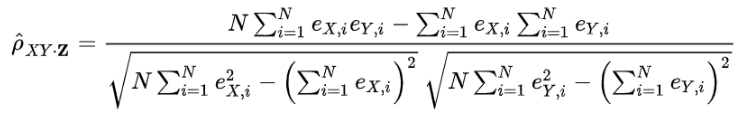

In [155]:
#定義計算partial correlation的函式(一)
def part_corr_st(ei_1, ei_2):
  N = len(ei_1)
  #計算分子部分N*殘差相乘後的和
  numerator = N*((ei_1*ei_2).sum())-(ei_1.sum())*(ei_2.sum())
  #計算分母
  denominator1 = math.sqrt(N*(ei_1**2).sum()-((ei_1.sum())**2))
  denominator2 = math.sqrt(N*(ei_2**2).sum()-((ei_2.sum())**2))
  denominator = denominator1*denominator2
  rxy_z = numerator/denominator
  return rxy_z
print('partial correlation(rXY_Z):', round(part_corr_st(ei_x,ei_y),4), 'for formula 1')

partial correlation(rXY_Z): 0.9939 for formula 1


第二個式子

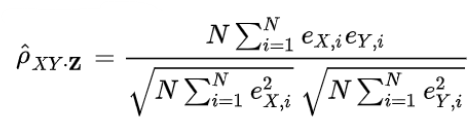

In [156]:
#定義計算partial correlation的函式(一)
def part_corr_nd(ei_1, ei_2):
  N = len(ei_1)
  #計算分子部分N*殘差相乘後的和
  numerator = N*((ei_1*ei_2).sum())
  denominator = (math.sqrt(N*(ei_1**2).sum()))*(math.sqrt(N*(ei_2**2).sum()))
  rxy_z = numerator/denominator
  return rxy_z
print('partial correlation(rXY_Z):', round(part_corr_nd(ei_x,ei_y),4), 'for formula 2')

partial correlation(rXY_Z): 0.9939 for formula 2


In [154]:
#確認兩種式子計算出的一樣(因為前面結果有四捨五入輸出)
if part_corr_st(ei_x,ei_y)==part_corr_nd(ei_x,ei_y):
  print("The partial correlation coefficients calculated by the two formulas are the same.")
else:
  print("The partial correlation coefficients calculated by these two formulas are not the same")

The partial correlation coefficients calculated by the two formulas are the same.
